# Extreme Learning Machines (ELMs)

ELMs are a class of artificial neural networks that do not require training.
Rather than using back-propagation and some form of gradient-descent training, the ELM is initialized with random weights on the single hidden layer, and linear activation functions to the output. This allows to compute the best-fit parameters by least squares!

Let's look at a simple example:

In [55]:
!ls input

test.csv  train.csv


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv("input/train.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
x_train = train.iloc[:,1:].values.astype('float32')
labels = train.iloc[:,0].values.astype('int32')

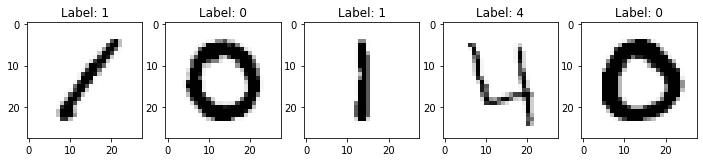

In [58]:
fig = plt.figure(figsize=(12, 12))
for i in range(5):
    fig.add_subplot(1, 5, i+1)
    plt.title('Label: {label}'.format(label=labels[i]))
    plt.imshow(x_train[i].reshape(28, 28), cmap='Greys')

In [59]:
Classes = 10
y_train = np.zeros([labels.shape[0], Classes])
for i in range(labels.shape[0]):
        y_train[i][labels[i]] = 1
y_train.view(type=np.matrix)

matrix([[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]])

In [60]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.25)
print('Train size: {train}, Test size: {test}'.format(train=x_train.shape[0], test=x_test.shape[0]))
INPUT_LENGHT = x_train.shape[1] # 784 
HIDDEN_UNITS = 10000

Win = np.random.normal(size=[INPUT_LENGHT, HIDDEN_UNITS])
print('Input Weight shape: {shape}'.format(shape=Win.shape))

Train size: 31500, Test size: 10500
Input Weight shape: (784, 10000)


In [61]:
def input_to_hidden(x):
    a = np.dot(x, Win)
    a = np.maximum(a, 0, a) # ReLU
    return a

In [62]:
X = input_to_hidden(x_train)
Xt = np.transpose(X)
Wout = np.dot(np.linalg.inv(np.dot(Xt, X)), np.dot(Xt, y_train))
print('Output weights shape: {shape}'.format(shape=Wout.shape))

Output weights shape: (10000, 10)


In [63]:
def predict(x):
    x = input_to_hidden(x)
    y = np.dot(x, Wout)
    return y

In [64]:

y = predict(x_test)
correct = 0
total = y.shape[0]
for i in range(total):
    predicted = np.argmax(y[i])
    test = np.argmax(y_test[i])
    correct = correct + (1 if predicted == test else 0)
print('Accuracy: {:f}'.format(correct/total))

Accuracy: 0.973524
